# Bike Share | Scalable Data Science

In [1]:
import urllib.request as urllib2
import requests, io, os
import csv

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [2]:
StringIO

_io.StringIO

In [3]:
UCI_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
response = requests.get(UCI_url)

In [4]:
response

<Response [200]>

In [5]:
zipped_file = io.BytesIO(response.content)

In [6]:
zipped_file

In [7]:
import tarfile, zipfile, gzip

In [8]:
z = zipfile.ZipFile(zipped_file)

In [9]:
z

<zipfile.ZipFile file=<_io.BytesIO object at 0x00000201C499C4C0> mode='r'>

In [10]:
os.getcwd()

'C:\\Users\\praveen\\DS_Notebooks\\projects\\BikeShare'

In [11]:
print ('Extracting into %s' %  os.getcwd()+'\\')

Extracting into C:\Users\praveen\DS_Notebooks\projects\BikeShare\


In [12]:
for name in z.namelist():
    if '.csv' in name:
        print ('\tunzipping %s' %name)
        z.extract(name, path=os.getcwd()+'\\')

	unzipping day.csv
	unzipping hour.csv


### Reading input file using CSV module

In [13]:
source = 'day.csv'
target = []
sep = ',' # We define this for being able to easily change it as required by the file
with open(os.getcwd()+'\\'+source, 'rt') as R:
    iterator = csv.reader(R, delimiter=sep)
    for n, row in enumerate(iterator):
        if n==0:
            header = row
        else:
            # DATA PROCESSING placeholder
            target.append(row)
            # MACHINE LEARNING placeholder
            pass
    print ('Total rows: %i' % (n+1))
    print ('Header: %s' % ', '.join(header))
    print ('Sample values: %s' % ', '.join(row))

Total rows: 732
Header: instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
Sample values: 731, 2012-12-31, 1, 1, 12, 0, 1, 1, 2, 0.215833, 0.223487, 0.5775, 0.154846, 439, 2290, 2729


ERROR If mode of opening file is <i>'rb'</i> then 

[_csv.Error: iterator should return strings, not bytes (did you open the file in text mode?)]

In [14]:
header, target

(['instant',
  'dteday',
  'season',
  'yr',
  'mnth',
  'holiday',
  'weekday',
  'workingday',
  'weathersit',
  'temp',
  'atemp',
  'hum',
  'windspeed',
  'casual',
  'registered',
  'cnt'],
 [['1',
   '2011-01-01',
   '1',
   '0',
   '1',
   '0',
   '6',
   '0',
   '2',
   '0.344167',
   '0.363625',
   '0.805833',
   '0.160446',
   '331',
   '654',
   '985'],
  ['2',
   '2011-01-02',
   '1',
   '0',
   '1',
   '0',
   '0',
   '0',
   '2',
   '0.363478',
   '0.353739',
   '0.696087',
   '0.248539',
   '131',
   '670',
   '801'],
  ['3',
   '2011-01-03',
   '1',
   '0',
   '1',
   '0',
   '1',
   '1',
   '1',
   '0.196364',
   '0.189405',
   '0.437273',
   '0.248309',
   '120',
   '1229',
   '1349'],
  ['4',
   '2011-01-04',
   '1',
   '0',
   '1',
   '0',
   '2',
   '1',
   '1',
   '0.2',
   '0.212122',
   '0.590435',
   '0.160296',
   '108',
   '1454',
   '1562'],
  ['5',
   '2011-01-05',
   '1',
   '0',
   '1',
   '0',
   '3',
   '1',
   '1',
   '0.226957',
   '0.22927',
   '0.4

### Reading input file using Pandas

In [15]:
import pandas as pd

In [16]:
chunk_size = 1000
with open(os.getcwd()+'\\'+source, 'rt') as R:
    iterator = pd.read_csv(R, chunksize=chunk_size) 
    for n, data_chunk in enumerate(iterator):
        print ('Size of uploaded chunk: %i instances, %i features' % (data_chunk.shape))
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pass
    print ('Sample values: \n%s' % str(data_chunk.iloc[0]))

df = pd.read_csv(os.getcwd()+'\\'+source)
df.head()

Size of uploaded chunk: 731 instances, 16 features
Sample values: 
instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
holiday                0
weekday                6
workingday             0
weathersit             2
temp            0.344167
atemp           0.363625
hum             0.805833
windspeed       0.160446
casual               331
registered           654
cnt                  985
Name: 0, dtype: object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### SQLite

In [17]:
import os, sys
import sqlite3, csv,glob

SEP = ','

def define_field(s):
    try:
        int(s)
        return 'integer'
    except ValueError:
        try:
            float(s)
            return 'real'
        except:
            return 'text'

In [18]:
def create_sqlite_db(db='database.sqlite', file_pattern=''):
    conn = sqlite3.connect(db)
    conn.text_factory = str  # allows utf-8 data to be stored

    c = conn.cursor()

    # traverse the directory and process each .csv file useful for building the db
    target_files = glob.glob(file_pattern) 

    print ('Creating %i table(s) into %s from file(s): %s' % (len(target_files), db, ', '.join(target_files)))

    for k,csvfile in enumerate(target_files):
        # remove the path and extension and use what's left as a table name
        tablename = os.path.splitext(os.path.basename(csvfile))[0]

        with open(csvfile, "rt") as f:
            reader = csv.reader(f, delimiter=SEP)

            f.seek(0)
            for n,row in enumerate(reader):
                if n==11:
                    types = map(define_field,row)
                else:
                    if n>11:
                        break      

            f.seek(0)
            for n,row in enumerate(reader):
                if n==0:

                    sql = "DROP TABLE IF EXISTS %s" % tablename
                    c.execute(sql)
                    sql = "CREATE TABLE %s (%s)" % (tablename,
                              ", ".join([ "%s %s" % (col, ct) for col, ct  in zip(row, types)]))
                    print ('%i) %s' % (k+1,sql))
                    c.execute(sql)

                    # Creating indexes for faster joins on long strings
                    for column in row:
                        if column.endswith("_ID_hash"):
                            index = "%s__%s" % ( tablename, column )
                            sql = "CREATE INDEX %s on %s (%s)" % ( index, tablename, column )
                            c.execute(sql) 

                    insertsql = "INSERT INTO %s VALUES (%s)" % (tablename,
                                ", ".join([ "?" for column in row ]))

                    rowlen = len(row)
                else:
                    # raise an error if there are rows that don't have the right number of fields
                    if len(row) == rowlen:
                        c.execute(insertsql, row)
                    else:
                        print ('Error at line %i in file %s') % (n,csvfile)
                        raise ValueError('Houston, we\'ve had a problem at row %i' % n)

            conn.commit()
            print ('* Inserted %i rows' % n)

    c.close()
    conn.close()

In [19]:
create_sqlite_db(db='bikesharing.sqlite', file_pattern='*.csv')

Creating 2 table(s) into bikesharing.sqlite from file(s): day.csv, hour.csv
1) CREATE TABLE day (instant integer, dteday text, season integer, yr integer, mnth integer, holiday integer, weekday integer, workingday integer, weathersit integer, temp real, atemp real, hum real, windspeed real, casual integer, registered integer, cnt integer)
* Inserted 731 rows
2) CREATE TABLE hour (instant integer, dteday text, season integer, yr integer, mnth integer, hr integer, holiday integer, weekday integer, workingday integer, weathersit integer, temp real, atemp real, hum real, windspeed real, casual integer, registered integer, cnt integer)
* Inserted 17379 rows


In [20]:
import os, sys
import sqlite3
import pandas as pd

In [21]:
DB_NAME = 'bikesharing.sqlite'
DIR_PATH = os.getcwd()
CHUNK_SIZE = 2500

conn = sqlite3.connect(DIR_PATH+'\\'+DB_NAME)
conn.text_factory = str  # allows utf-8 data to be stored     
sql = "SELECT H.*, D.cnt AS day_cnt FROM hour AS H INNER JOIN day as D ON (H.dteday = D.dteday)"
DB_stream = pd.io.sql.read_sql(sql, conn, chunksize=CHUNK_SIZE)
for j,data_chunk in enumerate(DB_stream):
    print ('Chunk %i -' % (j+1)),
    print ('Size of uploaded chunk: %i istances, %i features' % (data_chunk.shape))

Chunk 1 -
Size of uploaded chunk: 2500 istances, 18 features
Chunk 2 -
Size of uploaded chunk: 2500 istances, 18 features
Chunk 3 -
Size of uploaded chunk: 2500 istances, 18 features
Chunk 4 -
Size of uploaded chunk: 2500 istances, 18 features
Chunk 5 -
Size of uploaded chunk: 2500 istances, 18 features
Chunk 6 -
Size of uploaded chunk: 2500 istances, 18 features
Chunk 7 -
Size of uploaded chunk: 2379 istances, 18 features


### Feature management with data streams

In [22]:
import os, csv
local_path = os.getcwd()
source = 'hour.csv'
sep = ','
running_mean = list()
running_std = list()
with open(local_path+'\\'+source, 'rt') as R:
    iterator = csv.DictReader(R, delimiter=sep)
    x = 0.0
    x_squared = 0.0
    for n, row in enumerate(iterator):
        temp = float(row['temp'])
        if n == 0:
            max_x, min_x = temp, temp
        else:
            max_x, min_x = max(temp, max_x),min(temp, min_x)
        x += temp
        x_squared += temp**2
        running_mean.append(x / (n+1))
        running_std.append(((x_squared - (x**2)/(n+1))/(n+1))**0.5)
        # DATA PROCESSING placeholder
        # MACHINE LEARNING placeholder
        pass
    print ('Total rows: %i' % (n+1))
    print ('Feature \'temp\': mean=%0.3f, max=%0.3f, min=%0.3f,sd=%0.3f' \
           % (running_mean[-1], max_x, min_x, running_std[-1]))

Total rows: 17379
Feature 'temp': mean=0.497, max=1.000, min=0.020,sd=0.193


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

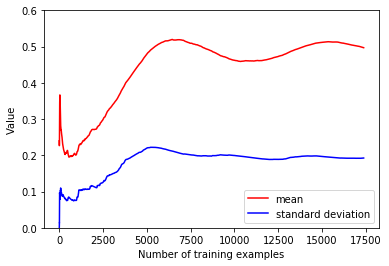

In [24]:
plt.plot(running_mean,'r-', label='mean')
plt.plot(running_std,'b-', label='standard deviation')
plt.ylim(0.0,0.6)
plt.xlabel('Number of training examples')
plt.ylabel('Value') 
plt.legend(loc='lower right', numpoints= 1)